In [2]:
import sys
!{sys.executable} -m pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
  Using cached statsmodels-0.13.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Using cached scipy-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.7 MB)


In [4]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("final.csv")

In [46]:
df.set_index('Date', inplace = True)

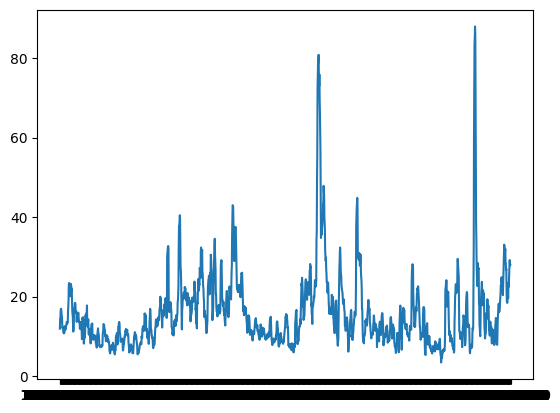

In [10]:
plt.plot(df['Volatility'])

In [47]:
columns = df

In [48]:
df.dropna(subset = ['Volatility'], inplace = True)

In [18]:
df['Volatility'].isna().sum()

0

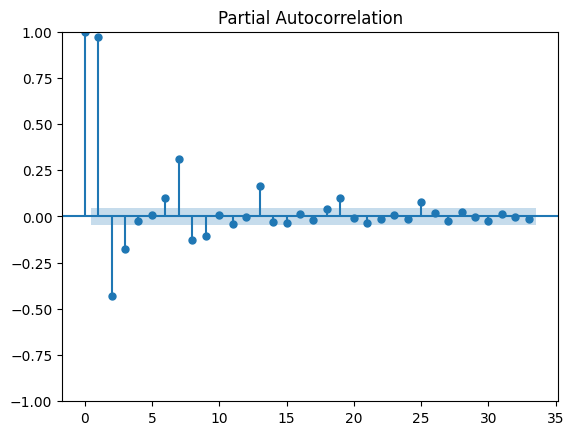

In [44]:
plot_pacf(df['Volatility'], method = 'ywm');

In [50]:
vol_df = df.copy()

In [51]:
lagged_data = []
for i in range(1,10):
    col_label = "Volshift" + str(i)
    vol_df[col_label] = vol_df['Volatility'].shift(i)
    lagged_data.append(col_label)

In [52]:
vol_df.dropna(subset = lagged_data, inplace = True)

In [73]:
vol_df

,Spread,Mcap,P/B,P/E,Close,Volatility,30y_yield,AA Yield,Mkt_rf,smb,...,Inflation,Volshift1,Volshift2,Volshift3,Volshift4,Volshift5,Volshift6,Volshift7,Volshift8,Volshift9
Date,,,,,,,,,,,,,,,,,,,,,
1990-10-26,1.30,1.783M,1.7418,13.9626,304.71,23.18,8.7750,9.45,-2.13,0.93,...,6.2,22.69,20.09,20.44,21.90,21.02,22.87,23.42,22.96,19.35
1990-11-02,1.29,1.825M,1.7747,14.2252,311.85,22.63,8.6890,9.47,1.86,-2.64,...,6.3,23.18,22.69,20.09,20.44,21.90,21.02,22.87,23.42,22.96
1990-11-09,1.37,1.836M,1.7865,14.3370,313.74,21.36,8.6220,9.38,0.87,-0.14,...,6.3,22.63,23.18,22.69,20.09,20.44,21.90,21.02,22.87,23.42
1990-11-16,1.34,1.857M,1.8078,14.4846,317.12,22.05,8.4500,9.30,1.41,1.07,...,6.3,21.36,22.63,23.18,22.69,20.09,20.44,21.90,21.02,22.87
1990-11-23,1.27,1.845M,1.7962,14.4179,315.10,19.02,8.4470,9.25,-0.73,0.54,...,6.3,22.05,21.36,22.63,23.18,22.69,20.09,20.44,21.90,21.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14,1.15,29.805M,3.6128,17.3490,3583.07,27.99,3.9916,5.06,-3.80,0.09,...,8.2,26.09,23.94,22.45,23.47,19.56,20.78,21.86,18.44,18.41
2022-10-21,1.18,31.21M,3.7839,18.1706,3752.75,29.19,4.3335,5.23,-3.80,0.09,...,8.2,27.99,26.09,23.94,22.45,23.47,19.56,20.78,21.86,18.44
2022-10-28,1.17,32.365M,3.9334,18.8887,3901.06,27.85,4.1414,5.24,-3.80,0.09,...,8.2,29.19,27.99,26.09,23.94,22.45,23.47,19.56,20.78,21.86


In [49]:
for key in df.keys():
    print(f"{key}: {df[key].isna().sum()}")

Spread: 15
Mcap: 5
P/B: 4
P/E: 0
Close: 0
Volatility: 0
30y_yield: 0
AA Yield: 15
Mkt_rf: 11
smb: 11
hml: 11
rf: 11
Yield: 635
3m: 45
Inflation: 1320


In [54]:
vol_df.ffill(inplace = True)

In [58]:
vol_df.dropna(inplace = True)

In [56]:
for key in vol_df.keys():
    print(f"{key}: {vol_df[key].isna().sum()}")

Spread: 0
Mcap: 0
P/B: 0
P/E: 0
Close: 0
Volatility: 0
30y_yield: 0
AA Yield: 0
Mkt_rf: 0
smb: 0
hml: 0
rf: 0
Yield: 4
3m: 33
Inflation: 4
Volshift1: 0
Volshift2: 0
Volshift3: 0
Volshift4: 0
Volshift5: 0
Volshift6: 0
Volshift7: 0
Volshift8: 0
Volshift9: 0


In [59]:
ret_df = df.copy()

In [62]:
ret_df.dropna(subset = ['Mkt_rf'], inplace = True)

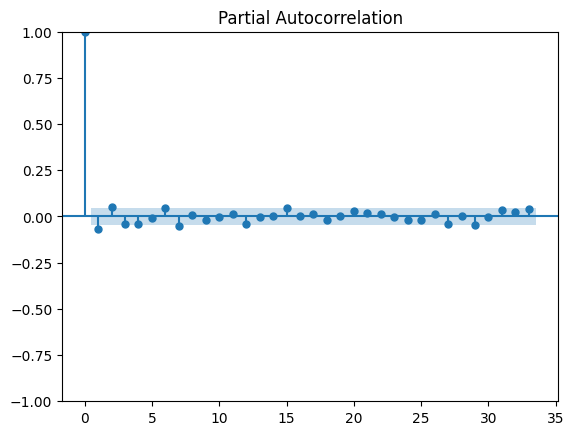

In [66]:
plot_pacf(ret_df['Mkt_rf'], method = 'ywm');

In [67]:
ret_df['Mkt_rf_shift'] = ret_df['Mkt_rf'].shift(1)

In [71]:
ret_df.ffill(inplace = True)

In [72]:
ret_df.dropna()

,Spread,Mcap,P/B,P/E,Close,Volatility,30y_yield,AA Yield,Mkt_rf,smb,hml,rf,Yield,3m,Inflation,Mkt_rf_shift
Date,,,,,,,,,,,,,,,,
1990-10-26,1.30,1.783M,1.7418,13.9626,304.71,23.18,8.7750,9.45,-2.13,0.93,-0.28,0.170,3.75,7.361,6.2,3.44
1990-11-02,1.29,1.825M,1.7747,14.2252,311.85,22.63,8.6890,9.47,1.86,-2.64,0.49,0.141,3.88,7.298,6.3,-2.13
1990-11-09,1.37,1.836M,1.7865,14.3370,313.74,21.36,8.6220,9.38,0.87,-0.14,-0.34,0.141,3.88,7.265,6.3,1.86
1990-11-16,1.34,1.857M,1.8078,14.4846,317.12,22.05,8.4500,9.30,1.41,1.07,-0.50,0.141,3.88,7.298,6.3,0.87
1990-11-23,1.27,1.845M,1.7962,14.4179,315.10,19.02,8.4470,9.25,-0.73,0.54,-0.63,0.141,3.88,7.245,6.3,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-29,1.17,34.325M,4.1572,20.1339,4130.29,20.97,3.0097,3.92,4.17,-0.61,1.18,0.020,1.58,2.364,9.1,2.76
2022-08-05,1.12,34.397M,4.1705,20.2291,4145.19,18.83,3.0662,3.91,0.87,3.53,-5.34,0.047,1.57,2.504,8.5,4.17
2022-08-12,1.09,35.528M,4.3062,20.8876,4280.15,18.41,3.1078,4.00,3.38,0.56,1.51,0.047,1.52,2.551,8.5,0.87


In [75]:
ret_df

,Spread,Mcap,P/B,P/E,Close,Volatility,30y_yield,AA Yield,Mkt_rf,smb,hml,rf,Yield,3m,Inflation,Mkt_rf_shift
Date,,,,,,,,,,,,,,,,
1990-01-05,0.97,NaN,NaN,15.1200,352.20,11.92,8.0560,8.89,-0.23,1.25,-0.76,0.141,3.17,NaN,4.6,NaN
1990-01-12,0.95,NaN,NaN,14.6600,339.93,14.44,8.1710,8.92,-3.56,0.51,0.61,0.141,3.17,NaN,4.6,-0.23
1990-01-19,0.95,NaN,NaN,14.2400,339.15,14.67,8.2700,8.98,-0.47,-0.28,-0.19,0.141,3.17,NaN,4.6,-3.56
1990-01-26,0.95,NaN,NaN,13.9400,325.80,16.41,8.5220,9.05,-4.21,-0.25,0.82,0.141,3.17,NaN,4.6,-0.47
1990-02-02,0.95,1.734M,2.0013,13.8364,330.92,16.93,8.5100,9.15,1.22,-1.74,-0.07,0.142,3.28,NaN,5.2,-4.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-29,1.17,34.325M,4.1572,20.1339,4130.29,20.97,3.0097,3.92,4.17,-0.61,1.18,0.020,1.58,2.364,9.1,2.76
2022-08-05,1.12,34.397M,4.1705,20.2291,4145.19,18.83,3.0662,3.91,0.87,3.53,-5.34,0.047,1.57,2.504,8.5,4.17
2022-08-12,1.09,35.528M,4.3062,20.8876,4280.15,18.41,3.1078,4.00,3.38,0.56,1.51,0.047,1.52,2.551,8.5,0.87


In [80]:
cols = [x for x in vol_df.keys() if x != 'Volatility']

In [83]:
round(len(vol_df)*0.7)

1171

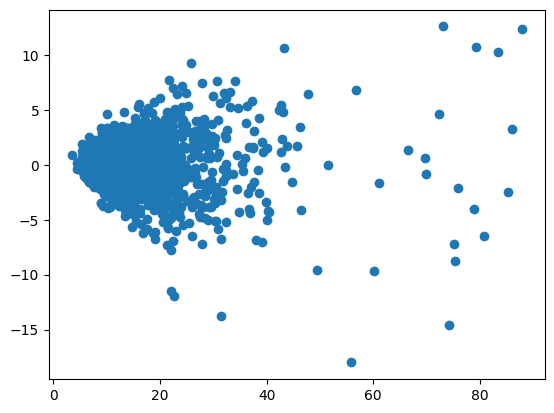

In [85]:
plt.scatter(vol_df['Volatility'], vol_df['Mkt_rf'])

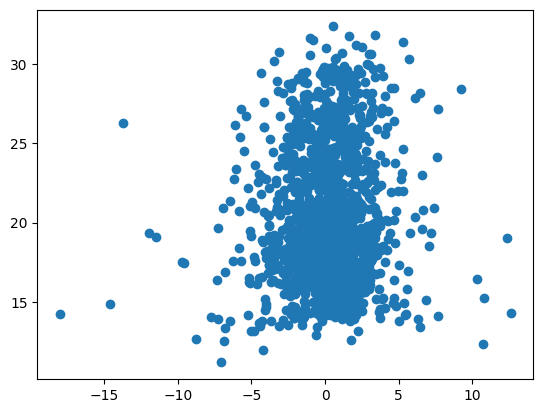

In [87]:
plt.scatter(vol_df['Mkt_rf'], vol_df['P/E'])